In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Understanding PAH Property Estimation

This document provides an overview of the Python functions used to estimate the physical and chemical properties of polycyclic aromatic hydrocarbons (PAHs), specifically cyanonaphthalene. The code avoids using vibrational frequency data from the AmesPAHdb database and focuses on analytical estimates derived from Chapter 6 of The Physics and Chemistry of the Interstellar Medium by A. G. G. M. Tielens

---

## Function Reference

### `approx_surface_area_pah(Nc)`

Estimates the surface area of a PAH molecule.

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms in the molecule.  
- **Returns**:  
  `float` – Surface area in cm².

---

### `approx_radius_pah(Nc)`

Estimates the effective radius of a PAH molecule.

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms.  
- **Returns**:  
  `float` – Radius in cm.

---

### `FUV_absorption_cross_section(Nc)`

Estimates the far-ultraviolet (FUV) absorption cross section of a PAH.

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms.  
- **Returns**:  
  `float` – FUV cross section in cm².

---

### `UV_absorption_timescale(Nc, G0)`

Estimates the timescale for UV absorption by a PAH in the interstellar medium.

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms.  
  `G0` (*float*): Habing field scaling factor (UV field strength in ISM).  
- **Returns**:  
  `float` – Absorption timescale in seconds.

---

### `vibrational_degrees_of_freedom(Na)`

Computes the number of vibrational degrees of freedom in a non-linear PAH molecule.

- **Parameters**:  
  `Na` (*int*): Total number of atoms in the molecule.  
- **Returns**:  
  `int` – Number of vibrational modes.

---

### `ionization_potential(Z, Nc)`

Estimates the ionization potential of a PAH molecule.

- **Context**:  
  PAHs with ionization potentials above 13.6 eV cannot be ionized by typical interstellar UV photons due to the hydrogen absorption cutoff.

- **Parameters**:  
  `Z` (*int*): Charge of the molecule.  
  `Nc` (*int*): Number of carbon atoms.  
- **Returns**:  
  `float` – Ionization potential in eV.

---

### `photo_el_ionization_rate(Nc, G0, fy)`

Estimates the rate of photo-electron ionization rate for a PAH.

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms.  
  `G0` (*float*): Habing field.  
  `fy` (*float*): Photo-electron yield enhancement factor.  
- **Returns**:  
  `float` – Ionization rate in electrons per second.

> **Note:** This function relies on a global variable `lab_IP` (laboratory ionization potential of 1-cyanonaphthalene from the NIST database). For better accuracy, it is recommended to pass `lab_IP` as an argument.

---

### `neutral_fraction(Nc, G0, T_ISM, J_Er, J_Pe, ne)`

- **Parameters**:  
  `Nc` (*int*): Number of carbon atoms.  
  `G0` (*float*): Habing field.  
  `T_ISM` (*float*): The temperature of the diffuse interstellar medium
  `J_Pe` (*float*): Photo-electron ionization rate
  `J_Er` (*float*): Electron recombination rate
  `ne` (*int*): Electron density of given astrophysical region
- **Returns**:  
  `float` – Fraction of neutral to ionized PAH molecules

---

### Constants Used for Cyanonaphthalene

These parameter values are used for test calculations with the molecule *1-cyanonaphthalene*:

| Parameter | Description                                        | Value       |
|----------:|----------------------------------------------------|-------------|
| `Na`      | Total number of atoms                              | 19          |
| `Nc`      | Number of carbon atoms                             | 11          |
| `G0`      | Habing field (diffuse ISM)                         | 1.7         |
| `lab_IP`  | Laboratory ionization potential of cyanonaphthalene | 8.6 eV      |
| `fy`      | Yield enhancement factor for small PAHs            | 10          |
| `J_er`    | Electron recombination rate coefficient at 300K            | 1.5 × 10⁻7 cm³ s⁻¹ |
| `T_ISM`    | Temperature estimate of diffuse ISM           | 80 K |
| `ne`    | Electron density of diffuse ISM          | 7.5 × 10⁻3 cm³ |

In [3]:
# PAH FUNCTIONS
def approx_surface_area_pah(Nc): 
    s_area = 5 * 10**(-16) * Nc
    return s_area

def approx_radius_pah(Nc):
    a = 0.9 * 10**(-8) * np.sqrt(Nc)
    return a

def FUV_absorption_cross_section(Nc):
    sigma = 7 * 10**(-18) * Nc
    return sigma

def UV_absorption_timescale(Nc,G0):
    t_UV = 1.4 * 10**(9) / (Nc*G0)
    return t_UV

def vibrational_degrees_of_freedom(Na):
    return 3*Na - 6

def ionization_potential(Z, Nc):
    IP = 4.4 + (Z + 0.5) * 25.1/np.sqrt(Nc)
    return IP

def photo_el_ionization_rate(Nc, G0, fy):
    J_pe = 2.5 * 10**(-13) * (13.6-lab_IP)**2 * Nc * G0 * fy
    return J_pe

def neutral_fraction(Nc, G0, T_ISM, J_Er, J_Pe, ne):
    # y0 = (J_Pe / J_Er) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
    # y1 = 3.5 * 10**(-6) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
    # y2 = 1.3 * 10**(-4) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
    y4 = (J_Pe / J_Er * ne) 
    #factor = (J_Pe / J_Er) 
    f0 = 1/(1 + y4)
    return f0

# CONSTANTS & PARAMETERS
Na = 19                
Nc = 11               
G0 = 1.7              
lab_IP = 8.6          
fy = 10              
J_Er = 1.5 * 10**(-7)
T_ISM = 80
ne = 7.5 * 10**(-3)

# CALCULATIONS
print("Vibrational degrees of freedom:", vibrational_degrees_of_freedom(Na))
print("Surface area:", approx_surface_area_pah(Nc), "cm^2")
print("Radius:", approx_radius_pah(Nc), "cm")
print("FUV cross section:", FUV_absorption_cross_section(Nc), "cm^2")
print("UV absorption timescale:", UV_absorption_timescale(Nc, G0), "seconds", "which is equivalent to ", UV_absorption_timescale(Nc, G0) / 3.154e7, "years")
print("Ionization potential (Z=0):", ionization_potential(0, Nc), "eV", "and the laboratory value for 1-cyanonaphthalene has been measured to be 8.59 - 8.61 eV")
print("Ionization potential (Z=1):", ionization_potential(1, Nc), "eV")
print("Photoelectron ionization rate:", photo_el_ionization_rate(Nc, G0, fy), "electrons s^-1")
print("Neutral fraction:", neutral_fraction(Nc, G0, T_ISM, J_Er, photo_el_ionization_rate(Nc, G0, fy), ne), "which is the ratio of neutral to ionized PAHs")

Vibrational degrees of freedom: 51
Surface area: 5.5e-15 cm^2
Radius: 2.98496231131986e-08 cm
FUV cross section: 7.7e-17 cm^2
UV absorption timescale: 74866310.16042781 seconds which is equivalent to  2.3736940444016428 years
Ionization potential (Z=0): 8.183967374450933 eV and the laboratory value for 1-cyanonaphthalene has been measured to be 8.59 - 8.61 eV
Ionization potential (Z=1): 15.751902123352803 eV
Photoelectron ionization rate: 1.1687500000000001e-09 electrons s^-1
Neutral fraction: 0.9999415659147419 which is the ratio of neutral to ionized PAHs


### Calculating the vibrational & rotational partition functions

In the case of cyanonapthalene, the most likely bond to break in the molecule would be the -CN bond as given by the reaction here:
C10H7CN+ → C10H6+ + HCN + ϵ (where ϵ is the kinetic energy)

In [4]:
# WAVENUMBER DATA
N1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\strong_frequencies_neutral1cyano.csv', header=None).squeeze().tolist()
C1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\strong_frequencies_cation1cyano.csv', header=None).squeeze().tolist()
TS_N1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\transition_strong_frequencies_neutral1cyano.csv', header=None).squeeze().tolist()
TS_C1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\transition_strong_frequencies_cation1cyano.csv', header=None).squeeze().tolist()

# PRINCIPAL MOMENTS OF INERTIA DATA & CONVERSION FACTORS
inertia_factor_amuAng = 1.6605390666000002e-47 # Principal moment of inertia from amu*angstrom^2 to kg*m^2
inertia_factor_au = 1.992851882e-46 # Principal moments of inertia from atomic units to kg*m^2

N1cyano_principal_moments = [341.37767327 * inertia_factor_amuAng, 532.72832397 * inertia_factor_amuAng, 874.10599724 * inertia_factor_amuAng] # Principal moments of inertia in kg*m^2
C1cyano_principal_moments = [341.39046846 * inertia_factor_amuAng, 535.88368599 * inertia_factor_amuAng, 877.27415445 * inertia_factor_amuAng]
TS_N1cyano_principal_moments = [1219.483541 * inertia_factor_au, 960.954403 * inertia_factor_au,  180.43794 * inertia_factor_au] 
TS_C1cyano_principal_moments = [1322.144212 * inertia_factor_au, 337.032003 * inertia_factor_au, 659.17620 * inertia_factor_au]

# CONSTANTS & PARAMETERS
c_cm = 2.99792458e10  # Speed of light in cm/s, since cm_freq is given in cm^-1
h = 6.62607015e-34 # Planck's constant in J/Hz
k_B = 1.380649e-23 # Boltzmann's constant in J/K
symmetry_number = 1 # 1-cyanonaphthalene is structurally asymmetric (also seen in principal moment inertias), so the symmetry number is 1. Also given in sigma notation
T_eval = 1000 # Temperature in K, evaluation of the partition function at 1000 K is done to see how many vibrational states are accessible at this temperature.

# FUNCTIONS
def scale_frequencies(wavenumber_list, scale_factor=0.96):
    return [freq * scale_factor for freq in wavenumber_list]

def vibrational_partition_function(wavenumbers_list, T):
    cm_freqs = np.array(wavenumbers_list)
    hz_freqs = cm_freqs * c_cm
    char_vib_temps = h * hz_freqs / k_B
    q_vibs = 1 / (1 - np.exp(-char_vib_temps / T))
    return np.prod(q_vibs)

def rotational_partition_function(symmetry_number, principal_moments, T):
    return (np.pi**2 / symmetry_number) * \
           np.sqrt(8*np.pi*principal_moments[0] * k_B*T / h**2) * \
           np.sqrt(8*np.pi*principal_moments[1] * k_B*T / h**2) * \
           np.sqrt(8*np.pi*principal_moments[2] * k_B*T / h**2)

def compute_partition_functions(wavenumbers_list, principal_moments, T, symmetry_number=1):
    q_vib = vibrational_partition_function(wavenumbers_list, T)
    q_rot = rotational_partition_function(symmetry_number, principal_moments, T)
    return q_vib, q_rot

# CALCULATIONS
scaled_TS_N_freqs = scale_frequencies(TS_N1cyano_wavenumbers_list, 0.96)
scaled_TS_C_freqs = scale_frequencies(TS_C1cyano_wavenumbers_list, 0.96)

q_vib_N, q_rot_N = compute_partition_functions(N1cyano_wavenumbers_list, N1cyano_principal_moments, T_eval)
q_vib_C, q_rot_C = compute_partition_functions(C1cyano_wavenumbers_list, C1cyano_principal_moments, T_eval)
q_vib_TS_N, q_rot_TS_N = compute_partition_functions(scaled_TS_N_freqs, TS_N1cyano_principal_moments, T_eval)
q_vib_TS_C, q_rot_TS_C = compute_partition_functions(scaled_TS_C_freqs, TS_C1cyano_principal_moments, T_eval)

print("Vibrational partition function (neutral 1-cyanonaphthalene):", q_vib_N, "The rotational partition function (neutral 1-cyanonaphthalene):", q_rot_N)
print("Vibrational partition function (cation 1-cyanonaphthalene):", q_vib_C, "The rotational partition function (cation 1-cyanonaphthalene):", q_rot_C)
print("Vibrational partition function (transition state neutral 1-cyanonaphthalene):", q_vib_TS_N, "The rotational partition function (transition state neutral 1-cyanonaphthalene):", q_rot_TS_N)
print("Vibrational partition function (transition state cation 1-cyanonaphthalene):", q_vib_TS_C, "The rotational partition function (transition state cation 1-cyanonaphthalene):", q_rot_TS_C)

Vibrational partition function (neutral 1-cyanonaphthalene): 5.544077488182599 The rotational partition function (neutral 1-cyanonaphthalene): 5916195.513425924
Vibrational partition function (cation 1-cyanonaphthalene): 25.157890192110596 The rotational partition function (cation 1-cyanonaphthalene): 5944545.396059827
Vibrational partition function (transition state neutral 1-cyanonaphthalene): 61684.14685472909 The rotational partition function (transition state neutral 1-cyanonaphthalene): 283682270.69831663
Vibrational partition function (transition state cation 1-cyanonaphthalene): 341272.7354960699 The rotational partition function (transition state cation 1-cyanonaphthalene): 334352555.04264796


The entropy change is: 99.06898368852937 cal/mol K
The entropy change is: 99.77995440629475 cal/mol K


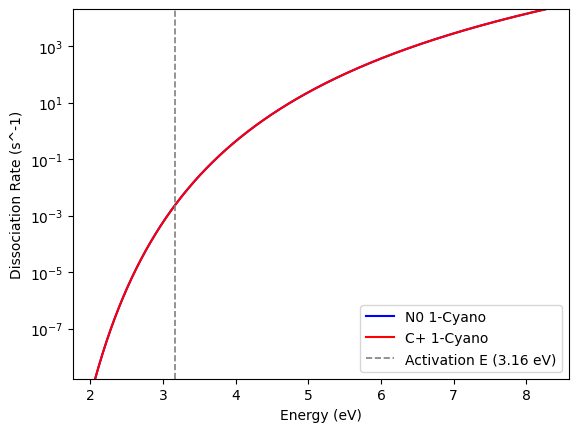

In [5]:
# CONSTANTS & PARAMETERS
h_eV = 4.135667696e-15 # Planck's constant in eV/Hz
k_B = 1.380649e-23 # Boltzmann's constant in J/K
R_gas = 8.31446261815324 # Ideal gas constant in J/(mol*K)
Na = 6.02214076e23 # Avogadro's number in mol^-1
T_eval = 1000 # Temperature in K, evaluation of the partition function at 1000 K is done to see how many vibrational states are accessible at this temperature.
max_photon_frequency = 2.0e15 
min_photon_frequency = 5.0e14 
frequency_list = np.logspace(np.log10(min_photon_frequency),np.log10(max_photon_frequency),num=10000) # Arrays of frequencies in Hz,adjust num for resolution
bond_energy = 3.16 # The dissocation/activation energy of the HCN bond of cyanonaphthalene in eV, given in the paper by H. Stockett et al. (2023) DOI: 10.1038/s41557-023-01283-0.
k_diss_N_list = [] # List to store the dissociation rates for each frequency
k_diss_C_list = [] # List to store the dissociation rates for each frequency
energies_list = [] # List to store the energies for each frequency

# FUNCTIONS
def d_entropy(q_vib_parent, q_rot_parent, q_vib_transition, q_rot_transition, activation_energy, T):
    delta_S = k_B * np.log((q_vib_transition * q_rot_transition) / (q_vib_parent * q_rot_parent)) + ((activation_energy * 1.602e-19) / T) 
    return delta_S

def PAH_effective_temperature(light_freq, Nc, bond_energy):
    T_eff = 2000 * ((h_eV * light_freq) / Nc) ** 0.4 * (1 - 0.2 * bond_energy / (h_eV * light_freq)) # energies in eV
    return T_eff

def pre_exponential_factor(T_eff, delta_S):
    k0 = k_B * T_eff / h * np.exp(1 + delta_S / R_gas)
    return k0

def unimolecular_dissociation_rate(k0, T_eff, bond_energy):
    k_diss = k0 * np.exp(-bond_energy * 1.602e-19 / (k_B * T_eff)) # energies in eV
    return k_diss

# CALCULATIONS
delta_S_N = d_entropy(q_vib_N, q_rot_N, q_vib_TS_N, q_rot_TS_N, bond_energy, T_eval)
delta_S_C = d_entropy(q_vib_C, q_rot_C, q_vib_TS_C, q_rot_TS_C, bond_energy, T_eval)
print("The entropy change is:", (delta_S_N * Na / 4.184), "cal/mol K") # Convert to cal/mol K
print("The entropy change is:", (delta_S_C * Na / 4.184), "cal/mol K") # Convert to cal/mol K

for i in frequency_list:
    T_eff = PAH_effective_temperature(i, Nc, bond_energy)
    energies_list.append(h_eV * i) # Append the energy to the list
    
    k0_N = pre_exponential_factor(T_eff, delta_S_N)
    k_diss_N = unimolecular_dissociation_rate(k0_N, T_eff, bond_energy)
    k_diss_N_list.append(k_diss_N) # Append the dissociation rate to the list

    k0_C = pre_exponential_factor(T_eff, delta_S_C)
    k_diss_C = unimolecular_dissociation_rate(k0_C, T_eff, bond_energy)
    k_diss_C_list.append(k_diss_C) # Append the dissociation rate to the list

plt.plot(energies_list, k_diss_N_list, label='N0 1-Cyano', color='blue')
plt.plot(energies_list, k_diss_C_list, label='C+ 1-Cyano', color='red')
plt.axvline(x=bond_energy, color='gray', linestyle='--', linewidth=1.2, label='Activation E (3.16 eV)')
plt.legend()
plt.ylim(min(k_diss_N_list), max(k_diss_C_list))
plt.xlabel('Energy (eV)')
plt.ylabel('Dissociation Rate (s^-1)')
plt.yscale('log')

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_19892\600210111.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  k_RRKM = (reaction_degen * sum_of_states * (x_energy - bond_energy)) / (h_eV * density_of_states) #bond_energy * 1.602e-19


[np.float64(-1.2089946213125338e+16), np.float64(-inf), np.float64(-inf), np.float64(-inf), np.float64(-inf), np.float64(-inf), np.float64(-inf), np.float64(-inf), np.float64(-inf), np.float64(-inf), np.float64(-2.4119934030599148e+16), np.float64(-inf), np.float64(-inf), np.float64(-3.615291976785554e+16), np.float64(-inf), np.float64(-inf), np.float64(-inf), np.float64(-4.815592630728617e+16), np.float64(-inf), np.float64(-inf), np.float64(-6.0149939087369064e+16), np.float64(-7.216193938614742e+16), np.float64(-inf), np.float64(-8.41469584068826e+16), np.float64(-inf), np.float64(-inf), np.float64(-9.609600239022683e+16), np.float64(-1.0808102141096202e+17), np.float64(-inf), np.float64(-inf), np.float64(-6.600004740806428e+16), np.float64(-1.4396412839838566e+17), np.float64(-inf), np.float64(-1.5588319318390416e+17), np.float64(-8.991012705388309e+16), np.float64(-1.917603043317627e+17), np.float64(-2.036943587161941e+17), np.float64(-1.1380072022111515e+17), np.float64(-2.3952050

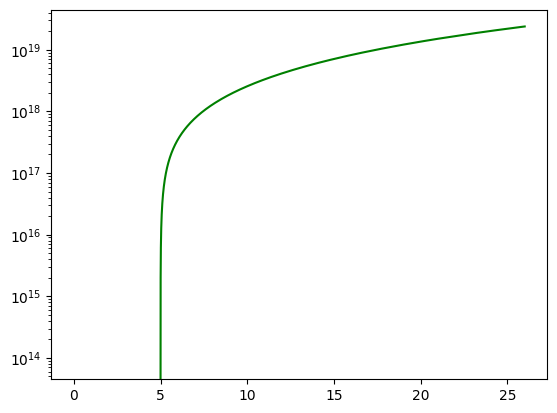

In [ ]:
k_RRKM_list = []
cm_to_eV = 1.23984e-4

df = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\densumout_26eV.out', 
                 skiprows=115, 
                 sep='\s+', 
                 names=["No.", "E-Emin", "Density", "Sum"])

density_of_states_list = df["Density"].tolist()
total_states = df["Sum"].tolist()
energy_list = np.array(df["E-Emin"]) * 1.23984e-4 # Convert from cm^-1 to eV

def RRKM_dissociation_rate(reaction_degen, sum_of_states, density_of_states, bond_energy, x_energy):
    k_RRKM = (reaction_degen * sum_of_states * (x_energy - bond_energy)) / (h_eV * density_of_states) #bond_energy * 1.602e-19
    return k_RRKM

for idx, (density, total, energy) in enumerate(zip(density_of_states_list, total_states, energy_list)):
    if energy <= bond_energy or density == 0:
        k_RRKM_list.append(0)
        continue

    density_eV = density / cm_to_eV  # Convert to states per eV

    k = RRKM_dissociation_rate(reaction_degen=1,sum_of_states=total,density_of_states=density_eV,bond_energy=bond_energy,x_energy=energy)
    k_RRKM_list.append(k)

print(k_RRKM_list)
plt.plot(energy_list, k_RRKM_list, label='RRKM', color='green')
plt.yscale('log')

In [ ]:
# Calculation of Einstein Coefficient

# Read .tbl file 
df = pd.read_csv('/Users/Mustafa/Documents/GitHub/Project-Cynap/Cynapfolder/Database/neutral1cyano_transitions.tbl', 
                 skiprows=11, 
                 sep='\s+', 
                 names=["UID", "FREQUENCY", "INTENSITY", "SCALE", "SYMMETRY"])

wavenumber_list = df["FREQUENCY"].tolist()
intensity_list = df["INTENSITY"].tolist()

# CONSTANTS & PARAMETERS
c_km = 2.99792458e5
c = 2.99792458e8 
c_cm = 2.99792458e10  # Speed of light in cm/s, since cm_freq is given in cm^-1
A_list = []

def einstein_coefficient(wavenumber, intensity):
    # A = (8 * np.pi / (Na * c_km)) * (wavenumber ** 2) * intensity 
    A = (1.2512 * 10**(-7)) * (wavenumber ** 2) * intensity
    return A

for idx, (wavenumber, intensity) in enumerate(zip(wavenumber_list, intensity_list)):
    A = einstein_coefficient(wavenumber, intensity)
    A_list.append(A)


Wavenumber: 102.6893 cm^-1 Intensity: 2.1072 Einstein Coefficient: 0.0027802437951327348 s^-1
Wavenumber: 132.488 cm^-1 Intensity: 4.7448 Einstein Coefficient: 0.01042072019927271 s^-1
Wavenumber: 171.2405 cm^-1 Intensity: 1.5385 Einstein Coefficient: 0.005644652500618665 s^-1
Wavenumber: 202.2808 cm^-1 Intensity: 0.2006 Einstein Coefficient: 0.0010269918319604028 s^-1
Wavenumber: 352.793 cm^-1 Intensity: 2.0077 Einstein Coefficient: 0.0312655068542413 s^-1
Wavenumber: 370.1135 cm^-1 Intensity: 1.1787 Einstein Coefficient: 0.020202256089967188 s^-1
Wavenumber: 432.929 cm^-1 Intensity: 0.2274 Einstein Coefficient: 0.005332741750880015 s^-1
Wavenumber: 453.7295 cm^-1 Intensity: 11.8881 Einstein Coefficient: 0.3062197647404105 s^-1
Wavenumber: 470.4873 cm^-1 Intensity: 1.235 Einstein Coefficient: 0.03420499277931681 s^-1
Wavenumber: 490.7216 cm^-1 Intensity: 0.1368 Einstein Coefficient: 0.004121764575899983 s^-1
Wavenumber: 542.3118 cm^-1 Intensity: 0.7783 Einstein Coefficient: 0.02863992